<h1> <center> GEOG 172: INTERMEDIATE GEOGRAPHICAL ANALYSIS </h1>
<h1> <center> FALL 2022 </h1>
    <h2> <center> Evgeny Noi </h2>
        <p> <center> noi@ucsb.edu </p>

# About me

|||
|---|---|
|<img src="https://www.geog.ucsb.edu/sites/default/files/styles/medium_square/public/2021-01/evgeny-noi.jpg?h=ed0ea6f1&itok=Wn-GHLdG" width=500px>|PhD candidate at UCSB Dept of Geography. I specialize in spatio-temporal visualizations that help exploratory spatial data analysis and data-driven knowledge discovery. In my day-to-day tasks I prefer using FOSS (free and open source) tools (e.g. Python, QGIS, GeoDa, R, PostGIS) that help make research more reproducible.|

# The outline of today's lecture

1. Course Introduction
    1. Syllabus
    2. Weekly Patterns 
    3. Success tips
2. GIS versus Geographical Analysis

# Course logistics 

1. **GauchoSpace** - dropboxes for quizzes and labs + announcements 
2. [**JupyterBook course page**](https://barguzin.github.io/ucsb_geog172/intro.html) - Syllabus, course materials, lab instructions 

# Evaluation 

1. Labs (40%) - the total of 8 labs. Lab 9 and 10 (as per Syllabus schedule) will be devoted to projects mostly. 
2. Project (30%) - 4 deliverables. 
    1. Data Report (5%)
    2. Interim Progress Report (5%) 
    3. Presentation (10%) 
    4. Final Report (10%) 

3. Weekly quizzes (20%) - multiple choice and short answers. Lowest quiz will be dropped. 
4. Participation (10%) - labs + lectures. 

# Labs 

* In-person (M/T). Switching Policy. 
* Python, GeoDa, ArcGIS / QGIS
* Due the following week before section! 
* Late Policy: 1% for each hour late
* See schedule in the Syllabus

# Why Project?

1. Projects mimic the on-the-job duties better. 
2. Spatial data tasks:
    1. Acquire data (not part of this course) 
    2. Process data (partly covered) 
    3. Explore the data (covered) 
    4. Generate hypotheses about the data
    5. Test hypothesis with statistics

# Project structure

1. Data report. Find spatial data and describe in Python using code snippets learned in lab sections. 
2. Interim data report. Utilize spatial statistics to characterize your data spatially. 
3. Project presentation. Week 10. Sign-up for time either during lecture time or during lab time. 
4. Final Report. 

# Quizzes 

* Short answers and mulitple choice. Every Thursday: 8.00 - 23.00. Lowest score - dropped. 

# Participation 

* Required for both labs and lectures

|Wk|Date|Topics|Readings|
|:-:|:-:|---|:-:|
|1|09/26|Introduction/Review of Spatial Analysis|GIA Ch1| 
|1|09/28|Review of Basic Statistics|TBD|
|2|10/3|Geographic Data|[SD](https://geographicdata.science/book/notebooks/03_spatial_data.html)|
|2|10/5|Distance, adjacency and MAUP|GIA Ch1|
|3|10/10|Geovisualization|GIA Ch3|
|3|10/12|Point Pattern Analysis|GIA Ch5,6|
|3|10/16|**Data Report Due**|⚠️|
|4|10/17|Correlation and Covariance||
|4|10/19|ANOVA||
|5|10/24|Spatial Autocorrelation 1|GIA Ch7|
|5|10/26|Spatial Autocorrelation 2||

|Wk|Date|Topics|Readings|
|:-:|:-:|---|:-:|
|6|10/31|LISA and Local Moran's $I$|GIA Ch8|
|6|11/2|Other Local Statistics|
|6|11/6|**Interim Data Report Due**|⚠️|
|7|11/7|Spatial Regression 1|[SR](https://geographicdata.science/book/notebooks/11_regression.html)|
|7|11/9|Spatial Regression 2||
|8|11/14|Spatial Clustering/Regionalization 1|[CR](https://geographicdata.science/book/notebooks/10_clustering_and_regionalization.html)|
|8|11/16|Spatial Clustering/Regionalization 2||
|9|11/21|Spatial Interpolation|GIA Ch9|
|9|11/23|Geostatistics|GIA Ch10|
|9|11/27|**Presentation slides due**|⚠️|
|10|11/28|Presentations 1||
|10|11/30|Presentations 2||
|11|12/7|**Final Report Due**|⚠️|

# Weekly Class Schedule 

1. M/W: lectures (see Syllabus for readings) 
2. M/T: lab sections (see Syllabus for lab schedule). Submit labs before the section the following week. 
3. R: take a quiz

# Questions 🍺? 

# Geographic Information Analysis 

* Geographic information analysis
    * Concerned with investigating patterns that arise as processes that may be operating in space
    * Techniques and methods that enable the representation, description, measurement, comparison, and generation of spatial patterns

* What is a pattern?
    * Potential realization of a process
    * Provide clues to the cause of processes
* What is a process?
    * The underlying phenomenon that operates in space

# Geographic Information Analysis 

* Geographic Information Systems 
* Remote Sensing 
* Exploratory Spatial Data Analysis (ESDA) 
* Statistics / Geostatistics
* Simulation / Agent-based Modeling / Cellular Automata
* Spatial Decision Support Systems
* Geovisualization


# GIS 

* System of hardware, software & procedures designed to support geographical decision making through the capture, management, manipulation, analysis, modeling and display of spatially referenced data
* Can handle geographic (spatially referenced) data or non-spatial attribute data
* Operations include:
    * Summary statistics, distance, intersection, buffer, map overlay, projection, transformation, etc.

# Here is what GIS is (in Python words)

In [1]:
import geopandas as gpd 
import osmnx as ox
import matplotlib.pyplot as plt
import contextily as cx
from IPython.display import Image
from pointpats import centrography
from matplotlib.patches import Ellipse
import numpy as np

ox.settings.use_cache = True

In [2]:
goleta = ox.geocode_to_gdf("Goleta, CA, USA") # get Goleta

go_graph = ox.graph_from_place('Goleta, CA, USA')
go_nodes, go_streets  = ox.graph_to_gdfs(go_graph)

tags = {'amenity': ['pub', 'bar', 'cafe', 'restaurant']} # used for parsing OSM data
dist = 5000 # set search radius (in meters) 

# download POIs
pois = ox.geometries.geometries_from_point(center_point = (goleta.lat[0],goleta.lon[0]), tags=tags, dist=dist)

go_proj = ox.project_gdf(goleta, to_crs='EPSG:3857') # re-project layers
go_streets_proj = ox.project_gdf(go_streets, to_crs='EPSG:3857')
pois_proj = ox.project_gdf(pois, to_crs='EPSG:3857')

# print to the output
print(f'There are {pois.shape} cafes/restaurants/bars/pubs in SB!')
pois.head(3)

There are (85, 58) cafes/restaurants/bars/pubs in SB!


amenity      brand brand:wikidata brand:wikipedia  \
element_type osmid                                                              
node         448863565         cafe  Starbucks         Q37158    en:Starbucks   
             1341709739  restaurant        NaN            NaN             NaN   
             1348747781  restaurant        NaN            NaN             NaN   

                             cuisine                         name  \
element_type osmid                                                  
node         448863565   coffee_shop                    Starbucks   
             1341709739     american                         IHOP   
             1348747781       indian  Masala Spice Indian Cuisine   

                            official_name takeaway  \
element_type osmid                                   
node         448863565   Starbucks Coffee      yes   
             1341709739               NaN      NaN   
             1348747781               NaN      NaN   

                                            geometry           source  ...  \
element_type osmid                                                     ...   
node         448863565   POINT (-119.84817 34.41147)              NaN  ...   
             1341709739  POINT (-119.78818 34.44325)  Local Knowledge  ...   
             1348747781  POINT (-119.82570 34.44172)              NaN  ...   

                        disused:building capacity height roof:colour  \
element_type osmid                                                     
node         448863565               NaN      NaN    NaN         NaN   
             1341709739              NaN      NaN    NaN         NaN   
             1348747781              NaN      NaN    NaN         NaN   

                        roof:shape contact:facebook addr:housename  \
element_type osmid                                                   
node         448863565         NaN              NaN            NaN   
             1341709739        NaN              NaN            NaN   
             1348747781        NaN              NaN            NaN   

                        designation ways type  
element_type osmid                             
node         448863565          NaN  NaN  NaN  
             1341709739         NaN  NaN  NaN  
             1348747781         NaN  NaN  NaN  

[3 rows x 58 columns]

In [3]:
go_streets_proj.highway.value_counts()[:15]

service                   15890
footway                   12784
residential                7977
path                       1446
tertiary                    772
secondary                   644
unclassified                249
cycleway                    150
track                        84
[residential, footway]       60
[footway, service]           60
motorway_link                44
[footway, path]              30
motorway                     27
living_street                14
Name: highway, dtype: int64

In [4]:
fig, ax = plt.subplots(figsize=(15,15))

major_str = go_streets_proj.loc[(go_streets_proj.highway=='secondary')|(go_streets_proj.highway=='primary')|(go_streets_proj.highway=='motorway')]

go_proj.plot(fc="blue", ec="blue", linewidth=3, alpha=.25, ax=ax, zorder=1, label='Goleta')
major_str.plot(color='k', ax=ax, zorder=2)
go_proj.centroid.plot(color='orange', markersize=200, marker='*', ax=ax, zorder=3)
go_proj.centroid.buffer(5000).plot(fc='none', ec='orange', linewidth=2, ax=ax, linestyle='dashed', zorder=4)
pois_proj.plot(column='amenity', markersize=20, ax=ax, categorical=True, legend=True, zorder=5)
cx.add_basemap(ax=ax)

ax.set_title('Cafes, restaraunts and bars\n within 5000m of Goleta,CA')
_ = ax.axis("off")

fig.savefig('goleta_cafe.png', bbox_inches='tight')
plt.close()

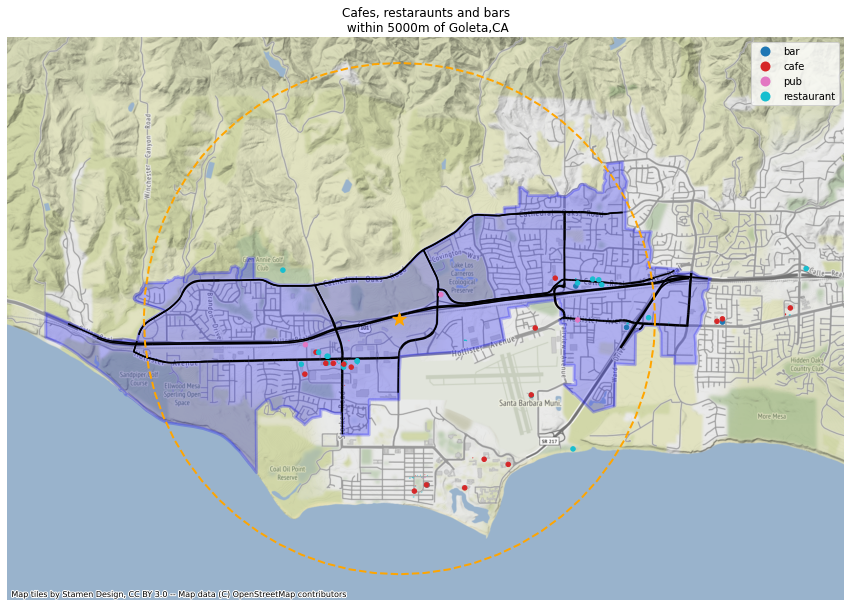

In [5]:
Image(filename='goleta_cafe.png')

# What Geographic Analysis is

## Centrography and Point Pattern Analysis

In [6]:
# create x and y for calculation with projected coords (meters)
pois = pois.to_crs('EPSG:3857')
pois['x'] = pois.geometry.centroid.x
pois['y'] = pois.geometry.centroid.y

In [7]:
mean_center = centrography.mean_center(pois[["x", "y"]])
med_center = centrography.euclidean_median(pois[["x", "y"]])
std_dist = centrography.std_distance(pois[["x", "y"]])
major, minor, rotation = centrography.ellipse(pois[["x", "y"]])

print(mean_center)
print(med_center)
print(std_dist)

[-13341454.75696344   4086141.85634311]
[-13342101.87019569   4085474.32197616]
2964.6474778578227


In [8]:
# Set up figure and axis
fig, ax = plt.subplots(1, figsize=(9, 9))
# Plot photograph points
ax.scatter(pois["x"], pois["y"], s=2)
ax.scatter(*mean_center, color="red", marker="x", label="Mean Center")
ax.scatter(
    *med_center, color="limegreen", marker="o", label="Median Center"
)

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(
    xy=mean_center,  # center the ellipse on our mean center
    width=major * 2,  # centrography.ellipse only gives half the axis
    height=minor * 2,
    angle=np.rad2deg(
        rotation
    ),  # Angles for this are in degrees, not radians
    facecolor="none",
    edgecolor="red",
    linestyle="--",
    label="Std. Ellipse",
)
ax.add_patch(ellipse)

ax.legend()
# Display
# Add basemap
cx.add_basemap(
    ax, source=cx.providers.Stamen.TonerLite
    #ax, source=cx.providers.OpenStreetMap.Mapnik
)

fig.savefig('centro.png', bbox_inches='tight')
plt.close()

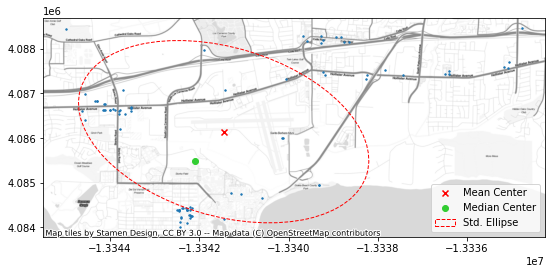

In [9]:
Image(filename='centro.png')

# Questions? 

## See you on Wednesday! Same time! 

### Do not forget to write down your name at attendance sheet! 